<a href="https://colab.research.google.com/github/jaybeberry9591/graph_theory_clustering_assignments/blob/main/fuzzy_c_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler

import sklearn.cluster as cluster
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import cluster_optics_dbscan
from sklearn import metrics


In [48]:
import numpy as np
import pandas as pd
from statistics import mode
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import geopandas as gpd
import folium
from folium.plugins import HeatMap

In [49]:
#csv file import and modifying the columns name
df = pd.read_csv("/content/drive/MyDrive/crime_boston.csv",encoding = 'windows-1252')
df.columns = df.columns.str.lower() # changing the columns name to work more easily

In [50]:
df.columns = df.columns.str.lower() # changing the columns name to work more easily

In [51]:
df.duplicated().sum()

23

In [52]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace = True)

In [53]:
df.incident_number.nunique()

282517

In [54]:
df[df.duplicated(['incident_number','offense_code'], keep = False)].head(10)

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
82375,I172090479,3115,INVESTIGATE PERSON,INVESTIGATE PERSON,A1,104,NaN,10/29/2017 16:52,2017,10,Sunday,16,NaN,WASHINGTON ST,42.356486,-71.059281,"(42.35648631, -71.05928145)"
82376,I172090479,3115,Investigate Person,INVESTIGATE PERSON,A1,104,NaN,10/29/2017 16:52,2017,10,Sunday,16,Part Three,WASHINGTON ST,42.356486,-71.059281,"(42.35648631, -71.05928145)"
318722,I152041086-00,2407,Disorderly Conduct,ANNOYING AND ACCOSTING,A1,111,NaN,8/17/2015 13:00,2015,8,Monday,13,Part Two,BOYLSTON ST,42.352368,-71.064543,"(42.35236776, -71.06454338)"
318723,I152041086-00,2407,Disorderly Conduct,ANNOYING AND ACCOSTIN,A1,111,NaN,8/17/2015 13:00,2015,8,Monday,13,Part Two,BOYLSTON ST,42.352368,-71.064543,"(42.35236776, -71.06454338)"
318750,I152026775-00,3115,Investigate Person,INVESTIGATE PERSON,C6,936,NaN,10/19/2015 16:04,2015,10,Monday,16,Part Three,ORTON-MAROTTA WAY,42.338573,-71.055755,"(42.33857289, -71.05575501)"
318751,I152026775-00,3115,INVESTIGATE PERSON,INVESTIGATE PERSON,C6,936,NaN,10/19/2015 16:04,2015,10,Monday,16,NaN,ORTON-MAROTTA WAY,42.338573,-71.055755,"(42.33857289, -71.05575501)"
318794,I152000618-00,1503,Firearm Violations,FIREARM/WEAPON - POSSESSION OF DANGEROUS,B2,308,NaN,7/20/2015 18:48,2015,7,Monday,18,Part Two,BOWER ST,42.319968,-71.087150,"(42.31996758, -71.08715022)"
318795,I152000618-00,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",B2,308,NaN,7/20/2015 18:48,2015,7,Monday,18,Part Two,BOWER ST,42.319968,-71.087150,"(42.31996758, -71.08715022)"
318846,I142033219-00,1842,Drug Violation,"DRUGS - POSS CLASS A - HEROIN, ETC.",D4,171,NaN,1/4/2016 17:20,2016,1,Monday,17,Part Two,HARRISON AVE,42.335119,-71.074917,"(42.33511904, -71.07491710)"
318847,I142033219-00,1842,Drug Violation,"DRUGS - POSS CLASS A - HEROIN, ETC.",D4,171,NaN,1/4/2016 17:20,2016,1,Monday,17,Part Two,HARRISON AVE,42.335119,-71.074917,"(42.33511904, -71.07491710)"


In [55]:
df.drop_duplicates(subset= ['incident_number','offense_code'], inplace=True)
df.reset_index(drop=True, inplace = True)

In [56]:
df.duplicated(['incident_number','offense_code'], keep = False).any()

False

In [57]:
# summary of numerical ones
df.describe(include='number')

,offense_code,year,month,hour,lat,long
count,319037.000000,319037.000000,319037.000000,319037.000000,299039.000000,299039.000000
mean,2317.536248,2016.560719,6.609603,13.118121,42.214368,-70.908252
std,1185.310509,0.996299,3.273643,6.294283,2.159892,3.493822
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297424,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [58]:
# summary of categorical ones
df.describe(include=['object']).T

,count,unique,top,freq
incident_number,319037,282517,I162030584,13
offense_code_group,319037,67,Motor Vehicle Accident Response,37132
offense_description,319037,241,SICK/INJURED/MEDICAL - PERSON,18783
district,317272,12,B2,49939
reporting_area,319037,879,,20250
shooting,1019,1,Y,1019
occurred_on_date,319037,232566,6/1/2017 0:00,29
day_of_week,319037,7,Friday,48488
ucr_part,318948,4,Part Three,158534
street,308166,4657,WASHINGTON ST,14191


In [59]:
df.columns

Index(['incident_number', 'offense_code', 'offense_code_group',
       'offense_description', 'district', 'reporting_area', 'shooting',
       'occurred_on_date', 'year', 'month', 'day_of_week', 'hour', 'ucr_part',
       'street', 'lat', 'long', 'location'],
      dtype='object')

In [60]:
df.dropna(subset= ["lat"], how ="any", inplace =True)
df.reset_index(drop=True, inplace = True)

In [61]:
df = df.drop(df[df.lat < 30].index)
df.reset_index(drop=True, inplace = True)

In [62]:
df.dropna(subset= ['district'], how ="any", inplace =True)
df.reset_index(drop=True, inplace = True)

In [63]:
df.reset_index(drop=True, inplace = True) # Reset index, in case I forgot to do it before when deleting rows
df_before_del_col = df.copy() # create a copy of the DF before dropping columns

In [64]:
df.drop('incident_number', axis = 1, inplace = True)
df.drop('offense_code', axis = 1, inplace = True)
df.drop('offense_description', axis = 1, inplace = True)
df.drop('reporting_area', axis = 1, inplace = True)
df.drop('occurred_on_date', axis = 1, inplace = True)
df.drop('year', axis = 1, inplace = True)
df.drop('street', axis = 1, inplace = True)
df.drop('location', axis = 1, inplace = True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297397 entries, 0 to 297396
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   offense_code_group  297397 non-null  object 
 1   district            297397 non-null  object 
 2   shooting            983 non-null     object 
 3   month               297397 non-null  int64  
 4   day_of_week         297397 non-null  object 
 5   hour                297397 non-null  int64  
 6   ucr_part            297308 non-null  object 
 7   lat                 297397 non-null  float64
 8   long                297397 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 20.4+ MB


In [66]:
import os
lookup = {
    1: 'Night',
    2: 'Night',
    3: 'Night',
    4: 'Night',
    5: 'Night',
    6: 'Night',
    7: 'Morning',
    8: 'Morning',
    9: 'Morning',
    10: 'Morning',
    11: 'Morning',
    12: 'Morning',
    13:'Afternoon',
    14:'Afternoon',
    15:'Afternoon',
    16:'Afternoon',
    17:'Afternoon',
    18:'Afternoon',
    19:'Evening',
    20:'Evening',
    21:'Evening',
    22:'Evening',
    23:'Evening',
    0:'Evening'
}
for fname in os.listdir('.'):
    df['day_period'] = df['hour'].apply(lambda x: lookup[x])

In [67]:
lookup = {
    12: 'Winter',
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn'
}
for fname in os.listdir('.'):
    df['season'] = df['month'].apply(lambda x: lookup[x])

In [68]:
lookup = {
    'Monday': 1,
    'Tuesday': 1,
    'Wednesday': 1,
    'Thursday': 1,
    'Friday': 1,
    'Saturday': 0,
    'Sunday': 0,
}
for fname in os.listdir('.'):
    df['weekday'] = df['day_of_week'].apply(lambda x: lookup[x])

In [69]:
df.sample(10)

,offense_code_group,district,shooting,month,day_of_week,hour,ucr_part,lat,long,day_period,season,weekday
68098,Residential Burglary,D14,NaN,12,Saturday,10,Part One,42.352353,-71.135979,Morning,Winter,0
237944,Residential Burglary,D14,NaN,2,Friday,14,Part One,42.355148,-71.126745,Afternoon,Winter,1
92116,Harassment,A1,NaN,9,Friday,12,Part Two,42.359132,-71.055050,Morning,Autumn,1
187145,Verbal Disputes,A7,NaN,8,Wednesday,18,Part Three,42.384922,-71.017464,Afternoon,Summer,1
224537,Motor Vehicle Accident Response,C6,NaN,4,Saturday,0,Part Three,42.333130,-71.035306,Evening,Spring,0
40576,Larceny,C6,NaN,3,Saturday,21,Part One,42.326966,-71.061986,Evening,Spring,0
99423,Motor Vehicle Accident Response,D4,NaN,8,Saturday,13,Part Three,42.347298,-71.087736,Afternoon,Summer,0
34567,Medical Assistance,D4,NaN,4,Wednesday,7,Part Three,42.339034,-71.079973,Morning,Spring,1
188316,Harassment,B3,NaN,8,Saturday,11,Part Two,42.278460,-71.077782,Morning,Summer,0
143247,Larceny,A1,NaN,2,Saturday,16,Part One,42.365929,-71.060486,Afternoon,Winter,0


In [70]:
df.drop('month', axis = 1, inplace = True)
df.drop('hour', axis = 1, inplace = True)
df.drop('day_of_week', axis = 1, inplace = True)

In [71]:
df.to_csv('df_crimes_cleaned.csv')

In [72]:
df = pd.read_csv('df_crimes_cleaned.csv', sep=",", index_col=0)
df.head()

,offense_code_group,district,shooting,ucr_part,lat,long,day_period,season,weekday
0,Larceny,D14,NaN,Part One,42.357791,-71.139371,Afternoon,Autumn,0
1,Vandalism,C11,NaN,Part Two,42.306821,-71.060300,Evening,Summer,1
2,Towed,D4,NaN,Part Three,42.346589,-71.072429,Evening,Autumn,1
3,Investigate Property,D4,NaN,Part Three,42.334182,-71.078664,Evening,Autumn,1
4,Investigate Property,B3,NaN,Part Three,42.275365,-71.090361,Evening,Autumn,1


In [73]:
df.shape

(297397, 9)

In [74]:
df.isnull().sum()

offense_code_group         0
district                   0
shooting              296414
ucr_part                  89
lat                        0
long                       0
day_period                 0
season                     0
weekday                    0
dtype: int64

In [75]:
df.dropna(subset= ['ucr_part'], how ="any", inplace =True)
df.reset_index(drop=True, inplace = True)

In [76]:
df.isnull().sum()

offense_code_group         0
district                   0
shooting              296330
ucr_part                   0
lat                        0
long                       0
day_period                 0
season                     0
weekday                    0
dtype: int64

In [77]:
# df.dropna(subset= ['shooting'], how ="any", inplace =True)
# df.reset_index(drop=True, inplace = True)

In [78]:
df.shape

(297308, 9)

In [79]:
df.head(5)

,offense_code_group,district,shooting,ucr_part,lat,long,day_period,season,weekday
0,Larceny,D14,NaN,Part One,42.357791,-71.139371,Afternoon,Autumn,0
1,Vandalism,C11,NaN,Part Two,42.306821,-71.060300,Evening,Summer,1
2,Towed,D4,NaN,Part Three,42.346589,-71.072429,Evening,Autumn,1
3,Investigate Property,D4,NaN,Part Three,42.334182,-71.078664,Evening,Autumn,1
4,Investigate Property,B3,NaN,Part Three,42.275365,-71.090361,Evening,Autumn,1


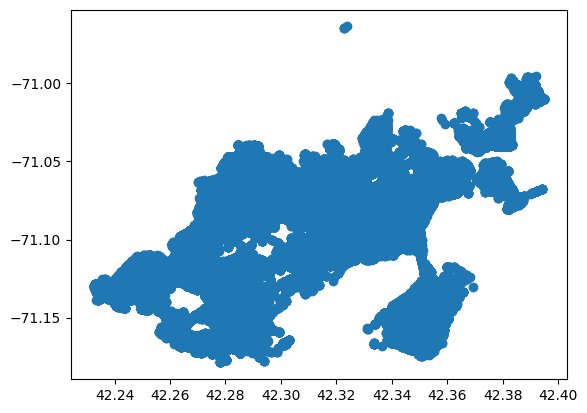

In [80]:
data=df.loc[:,['lat','long']]
plt.scatter(data.lat, data.long)

In [81]:
data=np.array(data)

In [82]:
K=5
m=3

U=np.random.rand(data.shape[0],K)
U/=np.sum(U, axis=1)[:,np.newaxis]
U

array([[0.0891734 , 0.03777239, 0.0262211 , 0.39644386, 0.45038926],
       [0.15056166, 0.29041831, 0.10722377, 0.1639657 , 0.28783055],
       [0.1891883 , 0.01865679, 0.19106013, 0.31141261, 0.28968217],
       ...,
       [0.24728651, 0.29061075, 0.30705026, 0.01919055, 0.13586194],
       [0.26228066, 0.25052866, 0.22405392, 0.20283002, 0.06030674],
       [0.1133367 , 0.21776628, 0.21207726, 0.23235136, 0.2244684 ]])

In [83]:
def calculate_centroid (data, K, U, m):
    Centroids=np.zeros((K,data.shape[1]))
    for i in range (K):
        Centroids[i,:]=np.sum((U[:,i]**m)[:,np.newaxis]*data, axis=0)/np.sum(U[:,i]**m)
    return Centroids

In [84]:
def calculate_membership (data, Centroids, K , m):
    U_new=np.zeros((data.shape[0],K))
    for i in range (K):
        U_new[:,i]=np.linalg.norm(data-Centroids[i,:],axis=1)

    U_new=1/ (U_new ** (2/(m-1)) * np.sum((1/U_new) ** (2/(m-1)) , axis=1 )[:,np.newaxis] )
    return U_new

In [85]:
max_iteration=100
for iteration in range (max_iteration):
    Centroids=calculate_centroid(data, 5, U , 3)
    U_new= calculate_membership (data,Centroids, 5 , 3 )



    if np.linalg.norm (U_new- U)<=0.00001:
        break
    U=U_new

    labels=np.argmax(U_new, axis=1)

<Axes: >

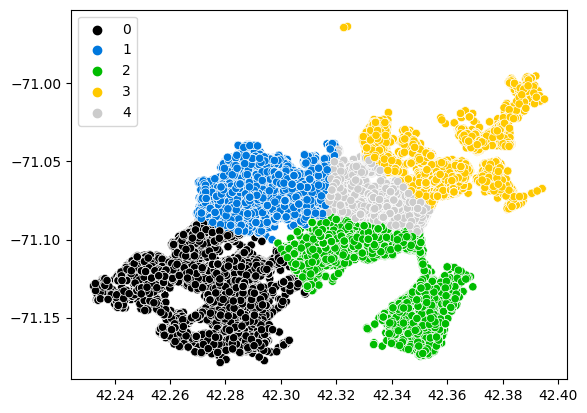

In [86]:
sns.scatterplot(data=data, x=data[:,0],y=data[:,1], hue=labels, palette='nipy_spectral')